# Project 7: Telecommunications Analysis

# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [49]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we might need to install or upgrade**

In [51]:
# If you don't care to create a virtual environment, here is what you need to do to download the libraries

# Run these directly in a cell to download the libraries:

#!pip install tensorflow
#!pip install pyspark
#!pip install scikit-optimize (for skopt)
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

# To update them, run this (with your desired library):

#!pip install --upgrade scikit-learn

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **View the data**

In [2]:
# Make sure to check the analysis done here: https://github.com/harshbg/Telecom-Churn-Data-Analysis/blob/master/1-Exploratory%20Data%20Analysis.ipynb
# there may be some valuable insights!

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("telecom_data.csv")

df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


- [x] **Check the data types.**

In [59]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

- [x] **Check the information of the dataset using the info statement.**

In [ ]:
df.info()

## 2. Reorganizing and Cleaning the Data

- [x] **Check for NaN values in all of the columns. Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [39]:
not_numbers = {}

for column in df.columns:
    not_numbers[column] = df[column].isna().sum()

print(not_numbers)

{'state': 0, 'account length': 0, 'area code': 0, 'phone number': 0, 'international plan': 0, 'voice mail plan': 0, 'number vmail messages': 0, 'total day minutes': 0, 'total day calls': 0, 'total day charge': 0, 'total eve minutes': 0, 'total eve calls': 0, 'total eve charge': 0, 'total night minutes': 0, 'total night calls': 0, 'total night charge': 0, 'total intl minutes': 0, 'total intl calls': 0, 'total intl charge': 0, 'customer service calls': 0, 'churn': 0}


- [x] **Check for missing values (empty slots). Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [41]:
empty_values = {}

for column in df.columns:
    empty_values[column] = (df[column] == "").sum()

print(empty_values)

{'state': 0, 'account length': 0, 'area code': 0, 'phone number': 0, 'international plan': 0, 'voice mail plan': 0, 'number vmail messages': 0, 'total day minutes': 0, 'total day calls': 0, 'total day charge': 0, 'total eve minutes': 0, 'total eve calls': 0, 'total eve charge': 0, 'total night minutes': 0, 'total night calls': 0, 'total night charge': 0, 'total intl minutes': 0, 'total intl calls': 0, 'total intl charge': 0, 'customer service calls': 0, 'churn': 0}


- [x] **Save the clean dataset.**

In [ ]:
# Create a cleaned_df = df.copy() and run it in the other cells above



- [x] **After all of this cleaning, have we lost any data? If yes, how much?**

In [65]:
# df_1 = pd.read_csv("telecom_data.csv")

# percent_data = len(clean_df)/len(df_1)
# percent_data

## 3. Exploratory Data Analysis and Visualizations

- [x] **Create plots of churn with different columns in a tight layout.**

C:\Users\micro\AppData\Local\Temp\ipykernel_25840\2203694239.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='coolwarm', ax=axes[0, 0])


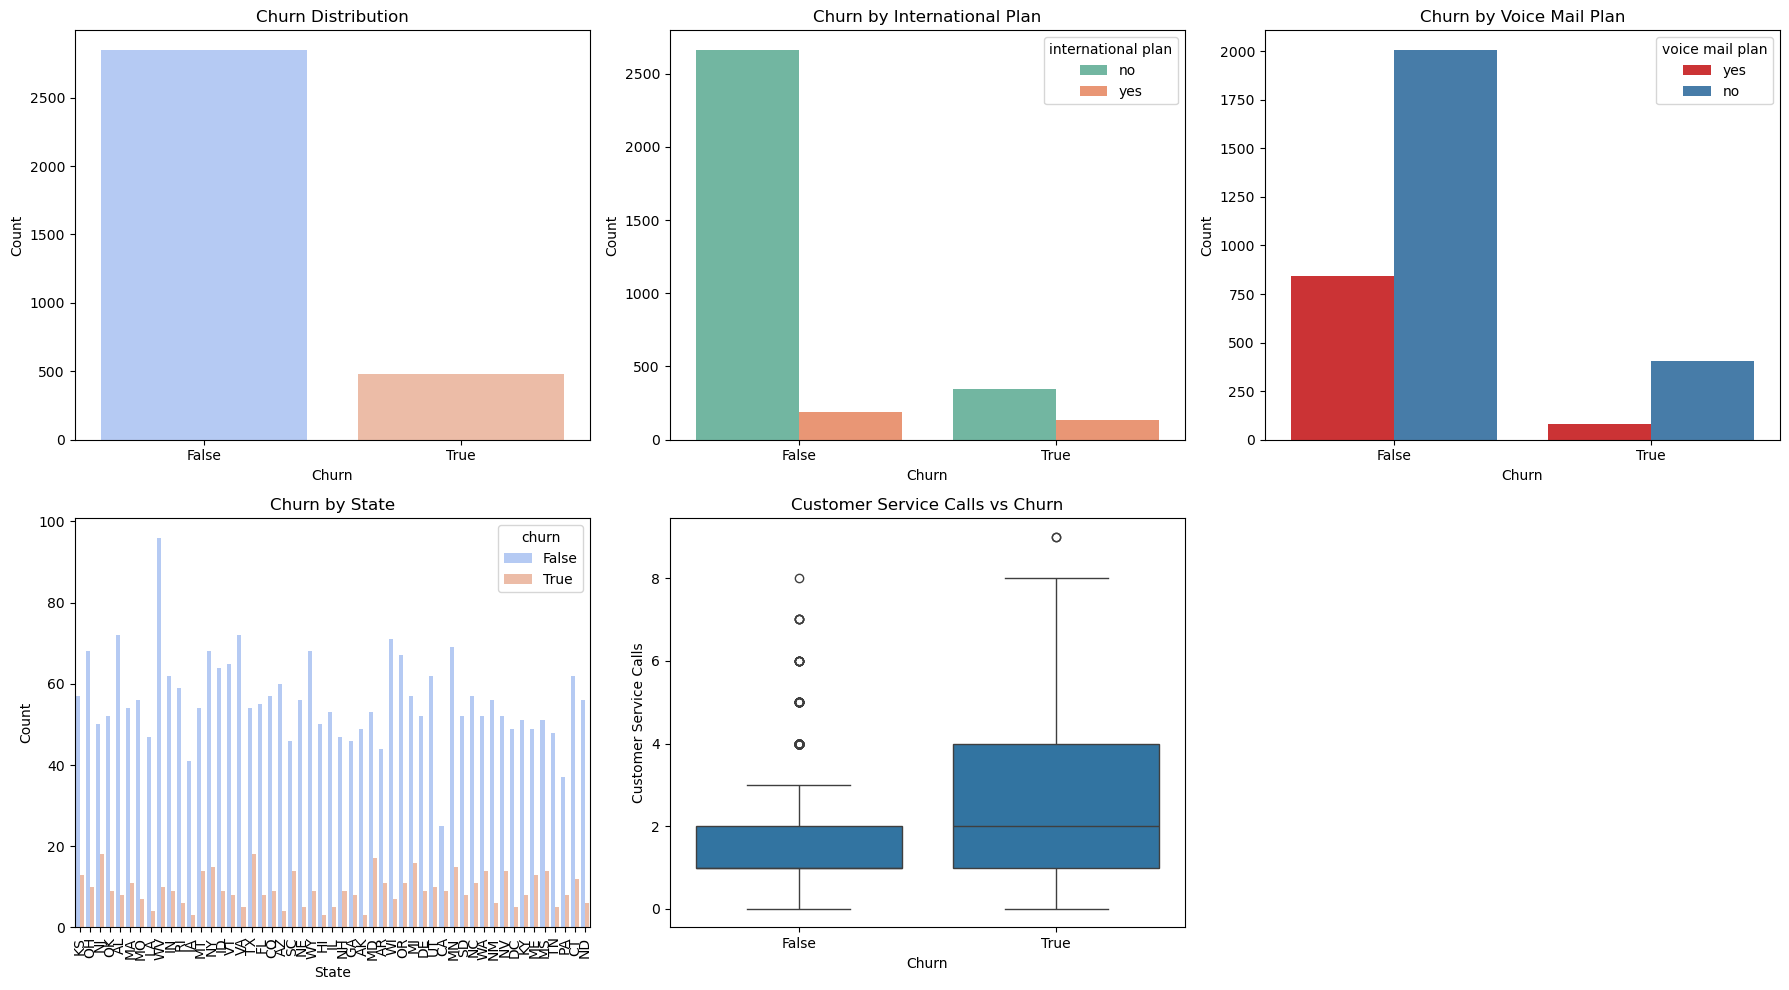

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(data=df, x='churn', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Count')

sns.countplot(data=df, x='churn', hue='international plan', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Churn by International Plan')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Count')

sns.countplot(data=df, x='churn', hue='voice mail plan', palette='Set1', ax=axes[0, 2])
axes[0, 2].set_title('Churn by Voice Mail Plan')
axes[0, 2].set_xlabel('Churn')
axes[0, 2].set_ylabel('Count')

sns.countplot(data=df, x='state', hue='churn', palette='coolwarm', dodge=True, ax=axes[1, 0])
axes[1, 0].set_title('Churn by State')
axes[1, 0].set_xlabel('State')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.boxplot(data=df, x='churn', y='customer service calls', ax=axes[1, 1])
axes[1, 1].set_title('Customer Service Calls vs Churn')
axes[1, 1].set_xlabel('Churn')
axes[1, 1].set_ylabel('Customer Service Calls')

# Hide the last subplot (bottom-right corner) if it's empty

axes[1, 2].axis('off')
fig.subplots_adjust(right=0.9, left=0.05, bottom=0.1, top=0.9)
plt.tight_layout()
plt.show()


- [x] **Create various histograms, and other visualizations that may be important, about the total minutes and total calls.**

C:\Users\micro\AppData\Local\Temp\ipykernel_25840\144434649.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Day Calls', 'Evening Calls', 'Night Calls'])


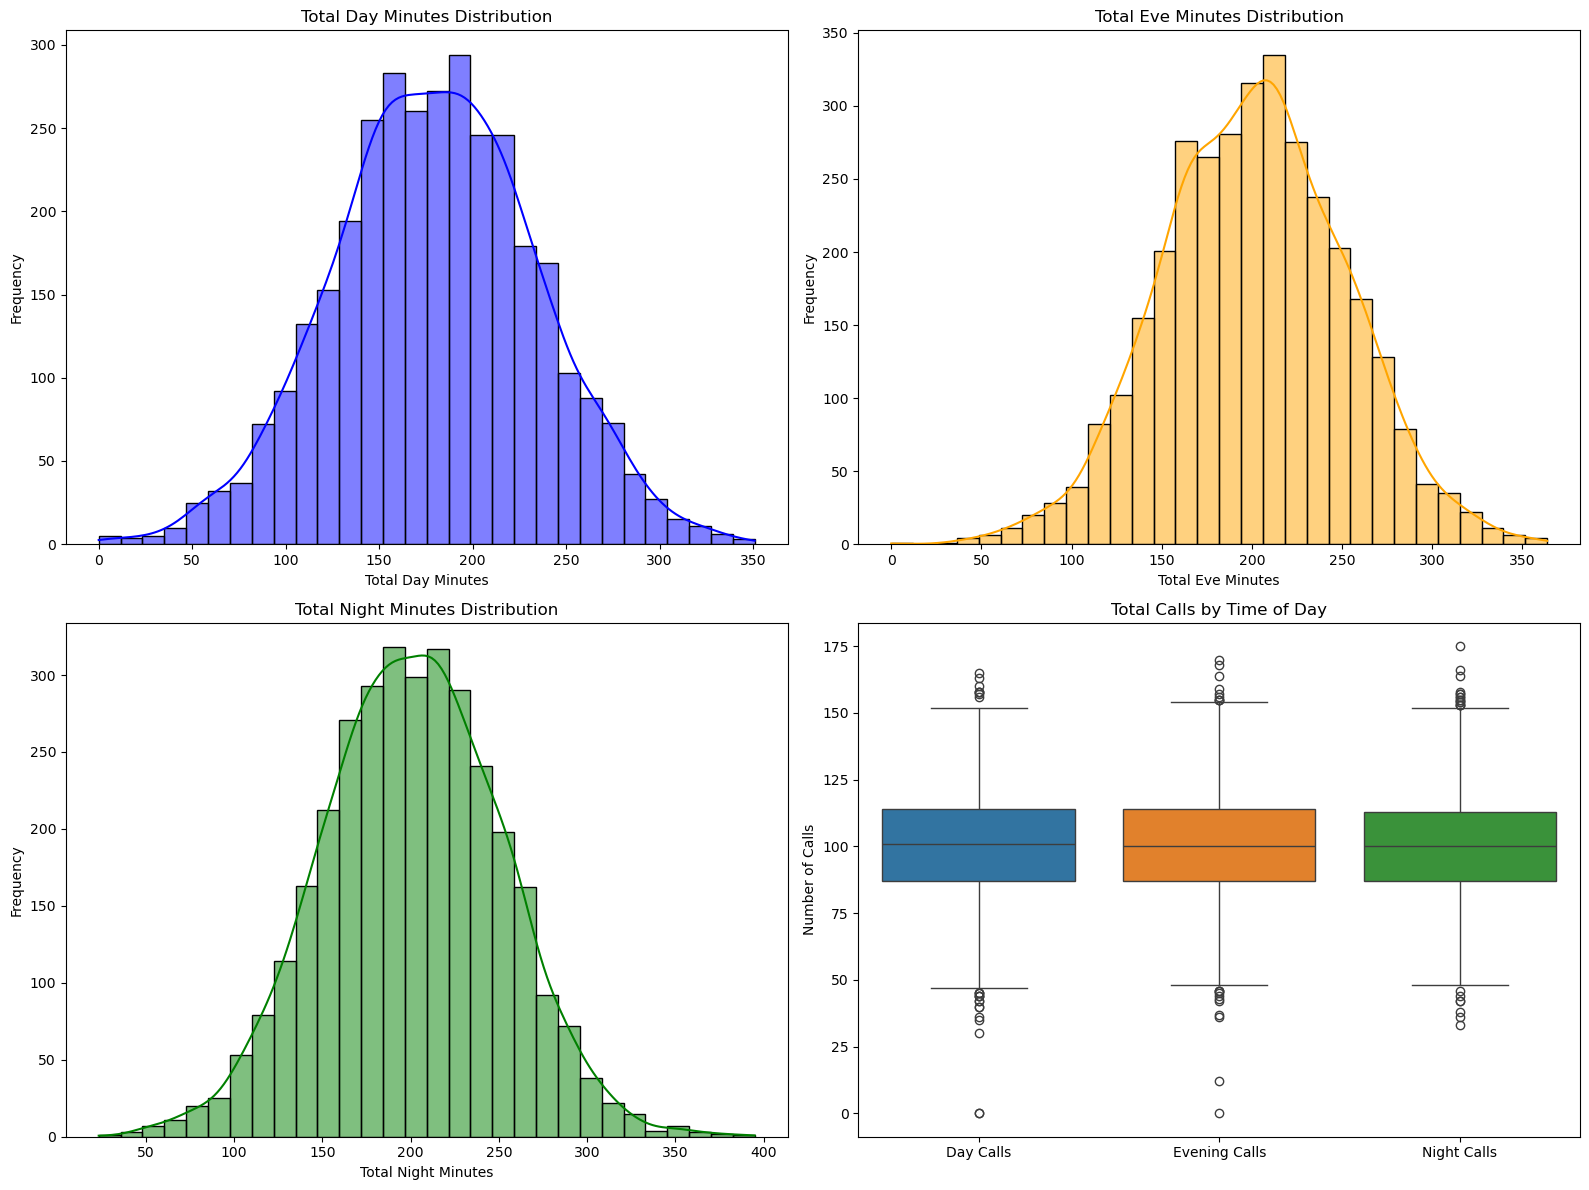

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))  

sns.histplot(df['total day minutes'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Total Day Minutes Distribution')
axes[0, 0].set_xlabel('Total Day Minutes')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['total eve minutes'], bins=30, kde=True, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Total Eve Minutes Distribution')
axes[0, 1].set_xlabel('Total Eve Minutes')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['total night minutes'], bins=30, kde=True, color='green', ax=axes[1, 0])
axes[1, 0].set_title('Total Night Minutes Distribution')
axes[1, 0].set_xlabel('Total Night Minutes')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(data=df[['total day calls', 'total eve calls', 'total night calls']], ax=axes[1, 1])
axes[1, 1].set_title('Total Calls by Time of Day')
axes[1, 1].set_ylabel('Number of Calls')
axes[1, 1].set_xticklabels(['Day Calls', 'Evening Calls', 'Night Calls'])

plt.tight_layout()
plt.show()


- [x] **Create various plots for total charge and revenue by state.**

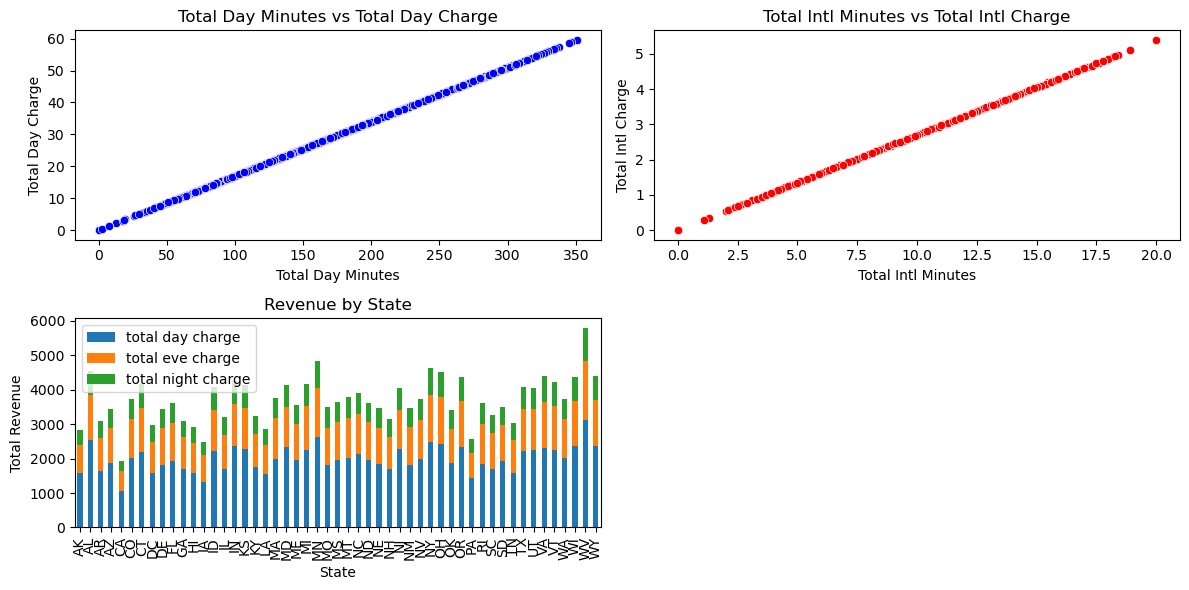

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df, x='total day minutes', y='total day charge', color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Total Day Minutes vs Total Day Charge')
axes[0, 0].set_xlabel('Total Day Minutes')
axes[0, 0].set_ylabel('Total Day Charge')

sns.scatterplot(data=df, x='total intl minutes', y='total intl charge', color='red', ax=axes[0, 1])
axes[0, 1].set_title('Total Intl Minutes vs Total Intl Charge')
axes[0, 1].set_xlabel('Total Intl Minutes')
axes[0, 1].set_ylabel('Total Intl Charge')

state_revenue = df.groupby('state')[['total day charge', 'total eve charge', 'total night charge']].sum()
state_revenue.plot(kind='bar', stacked=True, ax=axes[1, 0], figsize=(12, 6))
axes[1, 0].set_title('Revenue by State')
axes[1, 0].set_xlabel('State')
axes[1, 0].set_ylabel('Total Revenue')
axes[1, 0].tick_params(axis='x', rotation=90)

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


# Data Science (Using the Pandas Library)

## 4. Inferential Statistics

- [x] **Create a correlation matrix for various numerical columns.**

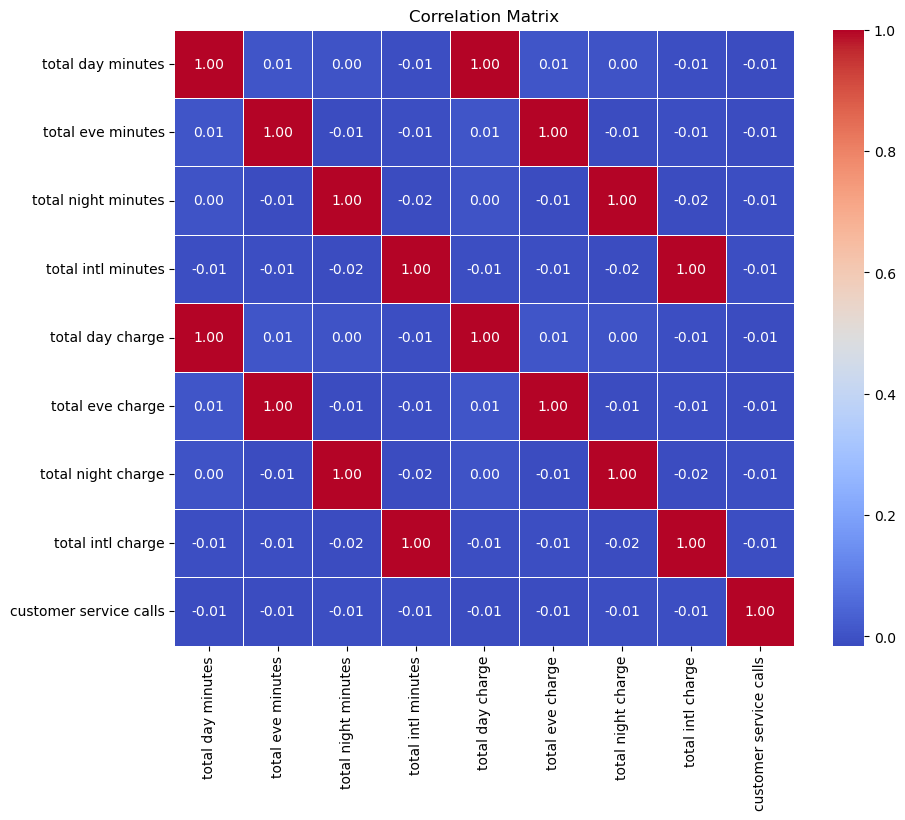

In [31]:
corr_matrix = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 
                  'total day charge', 'total eve charge', 'total night charge', 'total intl charge', 
                  'customer service calls']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- These are very poor values of correlation among these columns, indicating that they're not correlated whatsoever.

- [x] **Perform a $\chi^2$ test to conclude if there is an association between international plan and churn.**

In [64]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['international plan'], df['churn'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Squared Test: International Plan vs Churn")
print(f"Chi² = {chi2:.4f}, p_value = {p_value:.4f}, dof = {dof}")

# Since the p_value < 0.05, there's a statistically significant association between having an international plan and churn.


Chi-Squared Test: International Plan vs Churn
Chi² = 222.5658, p_value = 0.0000, dof = 1


- [x] **Do churned and non-churned customers have significantly different average total day charges?**

In [68]:
from scipy.stats import ttest_ind

churned = df[df['churn'] == True]['total day charge']
not_churned = df[df['churn'] == False]['total day charge']

t_stat, p_val = ttest_ind(churned, not_churned, equal_var=False)

print("\nT-Test: Total Day Charge vs Churn")
print(f"t = {t_stat:.4f}, p_value = {p_val:.4f}")

# Since p_value < 0.05, the average total day charge is significantly different between churned and non-churned customers. 


T-Test: Total Day Charge vs Churn
t = 9.6845, p_value = 0.0000


- [x] **Perform ANOVA to check if evening usage differs across area codes.**

In [ ]:
from scipy.stats import f_oneway

groups = [group['total eve minutes'].values for name, group in df.groupby('area code')]

f_stat, p_val = f_oneway(*groups)

print("\nANOVA: Total Evening Minutes across Area Codes")
print(f"F = {f_stat:.4f}, p_value = {p_val:.4f}")

# Since the p_value < 0.05, evening usage differs significantly across area codes.

## 5. Linear Regression

- [x] **Use linear regression models for the two graphs seen before for the total day charges.**

Day Charge Model:
  MAE: 0.0025
  MSE: 0.0000
  RMSE: 0.0029
  R²: 1.0000


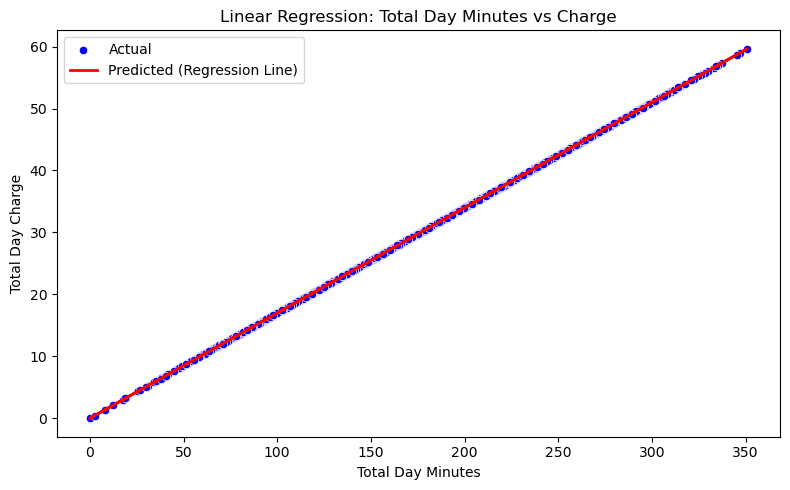


International Charge Model:
  MAE: 0.0025
  MSE: 0.0000
  RMSE: 0.0029
  R²: 1.0000


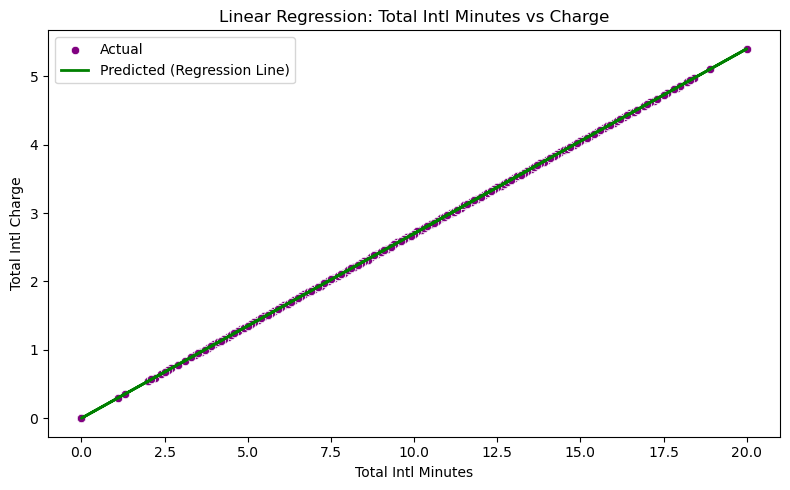

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_day = df[['total day minutes']]
y_day = df['total day charge']

regressor_day = LinearRegression()
regressor_day.fit(X_day, y_day)
y_pred_day = regressor_day.predict(X_day)

mae_day = mean_absolute_error(y_day, y_pred_day)
mse_day = mean_squared_error(y_day, y_pred_day)
rmse_day = np.sqrt(mse_day)
r2_day = r2_score(y_day, y_pred_day)

print("Day Charge Model:")
print(f"  MAE: {mae_day:.4f}")
print(f"  MSE: {mse_day:.4f}")
print(f"  RMSE: {rmse_day:.4f}")
print(f"  R²: {r2_day:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='total day minutes', y='total day charge', data=df, color='blue', label='Actual')
plt.plot(df['total day minutes'], y_pred_day, color='red', linewidth=2, label='Predicted (Regression Line)')
plt.title('Linear Regression: Total Day Minutes vs Charge')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Day Charge')
plt.legend()
plt.tight_layout()
plt.show()

X_intl = df[['total intl minutes']]
y_intl = df['total intl charge']

regressor_intl = LinearRegression()
regressor_intl.fit(X_intl, y_intl)
y_pred_intl = regressor_intl.predict(X_intl)

mae_intl = mean_absolute_error(y_intl, y_pred_intl)
mse_intl = mean_squared_error(y_intl, y_pred_intl)
rmse_intl = np.sqrt(mse_intl)
r2_intl = r2_score(y_intl, y_pred_intl)

print("\nInternational Charge Model:")
print(f"  MAE: {mae_intl:.4f}")
print(f"  MSE: {mse_intl:.4f}")
print(f"  RMSE: {rmse_intl:.4f}")
print(f"  R²: {r2_intl:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x='total intl minutes', y='total intl charge', data=df, color='purple', label='Actual')
plt.plot(df['total intl minutes'], y_pred_intl, color='green', linewidth=2, label='Predicted (Regression Line)')
plt.title('Linear Regression: Total Intl Minutes vs Charge')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Total Intl Charge')
plt.legend()
plt.tight_layout()
plt.show()

### Model's conclusions

- These results are a chef's kiss. the $R^2$ value being extremely close to 1 tells us that the linear regression model explains around 100% of the variance in the target variable.

- Normally we'd squint our eyes or raise our eyebrows but this time it makes sense, since there is literally a linear relationship between these variables: The charge is literally calculated using minutes with a fixed multiplier (e.g., $0.07 per minute or something similar). So it’s a deterministic, perfectly linear relationship, and the results corroborate that, as they should.

## 6. Isolation Forest

- [x] **Use an isolation forest model to check if there are any unusual or outlier customers based on their telecom usage.**

In [71]:
from sklearn.ensemble import IsolationForest

features = ['total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge', 
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

X = df[features]

model = IsolationForest(contamination=0.05)  
model.fit(X)

df['is_anomaly'] = model.predict(X)

print(df[['phone number', 'is_anomaly']].head())


  phone number  is_anomaly
0     382-4657           1
1     371-7191           1
2     358-1921           1
3     375-9999          -1
4     330-6626           1


## 7. One-Class SVM

- [x] **Use a One-class SVM to check if there are any customers whose usage is far outside the 'normal' pattern.**

In [74]:
from sklearn.svm import OneClassSVM

features = ['total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge', 
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

X = df[features]

model = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')  
model.fit(X)

df['is_anomaly_svm'] = model.predict(X)

print(df[['phone number', 'is_anomaly_svm']].head())


  phone number  is_anomaly_svm
0     382-4657               1
1     371-7191               1
2     358-1921               1
3     375-9999              -1
4     330-6626               1


## 8. Local Outlier Factor (LOF)

- [x] **Use a local outlier factor model to check which customers are outliers compared to their neighbors based on their telecom usage.**

In [77]:
from sklearn.neighbors import LocalOutlierFactor

features = ['total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge', 
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

X = df[features]

model = LocalOutlierFactor(n_neighbors=20, contamination=0.05) 
df['is_anomaly_lof'] = model.fit_predict(X)

df['is_anomaly_lof'] = df['is_anomaly_lof'].apply(lambda x: 1 if x == 1 else -1)

print(df[['phone number', 'is_anomaly_lof']].head())


  phone number  is_anomaly_lof
0     382-4657               1
1     371-7191               1
2     358-1921               1
3     375-9999              -1
4     330-6626               1


## 9. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

- [x] **Use a DBSCAN model to check if we can cluster customers based on their telecom usage patterns and identify any unusual or noisy customers.**

In [80]:
from sklearn.cluster import DBSCAN
import numpy as np

features = ['total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge', 
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

X = df[features]

model = DBSCAN(eps=0.5, min_samples=5) 
df['dbscan_cluster'] = model.fit_predict(X)

print(df[['phone number', 'dbscan_cluster']].head())


  phone number  dbscan_cluster
0     382-4657              -1
1     371-7191              -1
2     358-1921              -1
3     375-9999              -1
4     330-6626              -1


## 10. Gaussian Mixture Model (GMM)

- [x] **Check if we can model customer groups based on their telecom usage, with each group having a different usage distribution**

In [83]:
from sklearn.mixture import GaussianMixture

features = ['total day minutes', 'total day calls', 'total day charge', 
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge', 
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

X = df[features]

model = GaussianMixture(n_components=3, covariance_type='full')  # n_components defines the number of clusters
model.fit(X)

df['gmm_cluster'] = model.predict(X)

print(df[['phone number', 'gmm_cluster']].head())


  phone number  gmm_cluster
0     382-4657            1
1     371-7191            1
2     358-1921            1
3     375-9999            2
4     330-6626            0


# Transfering the Data to MySQL

- [x] **Save the original dataset with fixed columns**

In [ ]:
df = pd.read_csv("telecom_data.csv")

df.columns = df.columns.str.replace(' ', '_')

df.to_csv("sql_telecom_data.csv", index=False)

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


- [x] **Save the clean dataset**

In [ ]:
df = pd.read_csv("clean_telecom_data.csv")

df.columns = df.columns.str.replace(' ', '_')

df.to_csv("sql_clean_telecom_data.csv", index=False)

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
